**计算物理学(A)作业3：傅里叶变换\&函数优化**

姓名：刘思瑞

学号：2100017810

注意：请使用Python语言完成所有编程作业。允许并鼓励同学间合作，但严禁抄袭别人的代码，且严谨直接抄袭ChatGPT的代码；请直接在题干后附加代码块和必要的公式，讨论等；作图请包含x,y轴label，以及必要的图例。过多信息的缺失可能会导致丢分。

作业提交只需直接提交这个完成后的jupyter notebook，并命名为"姓名-学号-作业x"。

本次作业额外注意事项：**鼓励**大家使用`numpy.fft.fft`等相关函数！另外**第二题的(d)问和第三题的(b)(c)(d)问是附加题**，供感兴趣的同学自行探索；另外附加题溢出分数可以补全作业1、作业2失去的分数。

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (4, 3)

**1 熟悉np.fft.fft**

本问题十分的简单，甚至手搓轮子就可以10分钟内解决。但是我们希望通过这次作业让大家搞清楚`numpy.fft.fft`这个重要函数的输入、输出接口。因此，请避免自己手搓轮子(比如手动求和$a_k e^{ikx}$)，直接调包解决如下问题：

考虑时间序列$f(t)=2\cos(2\pi t)+4\cos(3\pi t+\frac{\pi}{4})+6\cos(5\pi t+\frac{\pi}{6})$.

**(a)** 请选取$t\in[0, 12]$，取$n=8000$个点画出$f(t)$时间序列，使用`numpy.fft.fft`包进行傅里叶变换，研究输出的格式细节，说服你自己（和助教本人）你能够反推出来原信号三个频率分量的**振幅，频率**，并根据实部/虚部的信息得出**相位**。

**(b)** 下面假设我们的时间序列受到了噪声的污染: $g(t)=f(t)+5\epsilon(t)$. 其中$\epsilon(t)$是满足标准正态分布的白噪声。请画出并观察傅里叶变换的频谱(振幅的模方vs.频率)，利用这个频谱进行合理滤波(滤掉振幅小的频率分量)，最后画出滤掉白噪声的平滑的时间序列。

上述问题就是最简单的滤波的实例，对于时间序列分析是非常非常重要且常用的技术。

**（a）**

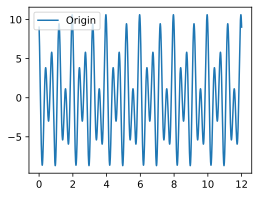

In [3]:
import math
def fun(t):
    return math.cos(2*math.pi*t) +4*math.cos(3*math.pi*t+math.pi/4)+6*math.cos(5*math.pi*t+math.pi/6)
x = np.linspace(0,12,8000,endpoint=True)
y = [fun(i) for i in x]
plt.plot(x,y,label='Origin')
plt.legend()

array([9.02457955, 9.04977324, 9.12645006, ..., 9.25806823, 9.12645006,
       9.04977324])

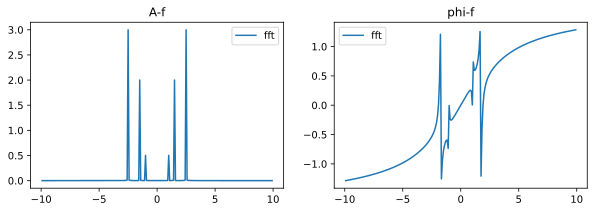

In [4]:
plt.rcParams['figure.figsize'] = (10, 3)
y_ = np.fft.fft(y)
frequency = np.fft.fftfreq(8000,12/8000)
plt.subplot(1,2,1)
frequency_=[]
y__ = []
te = []
for i in range(len(frequency)):
    if frequency[i] > -10 and frequency[i] <10:
        frequency_.append(frequency[i])
        y__.append(y_[i])
        te.append([frequency[i],y_[i]])
te.sort(key= lambda x: x[0])
frequency_ = np.array([i[0] for i in te])
y__ = np.array([i[1] for i in te])
plt.plot(frequency_,np.abs(y__/8000),label = 'fft')
plt.title('A-f')
plt.legend()
plt.subplot(1,2,2)
plt.plot(frequency_,np.arctan(np.true_divide(np.imag(y__),np.real(y__))),label = 'fft')
plt.title('phi-f')
plt.legend()
np.abs(y_)

可以看出，幅频特性上得到了原函数的三个频率，相频得到了三个函数耦合在一起的频率

**（b）**

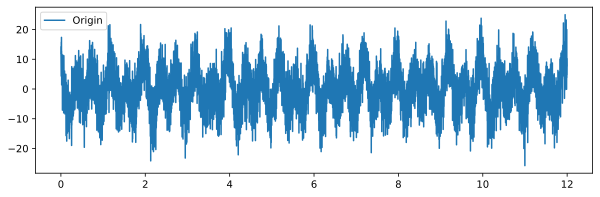

In [5]:
def g(t):
    return fun(t) + 5*np.random.normal()
x = np.linspace(0,12,8000,endpoint=True)
y = [g(i) for i in x]
plt.plot(x,y,label='Origin')
plt.legend()


0j

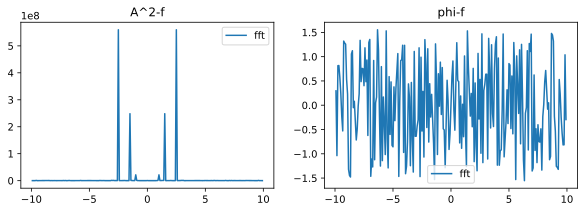

In [6]:
plt.rcParams['figure.figsize'] = (10, 3)
y_ = np.fft.fft(y)
frequency = np.fft.fftfreq(8000,12/8000)
plt.subplot(1,2,1)
frequency_=[]
y__ = []
te = []
for i in range(len(frequency)):
    if frequency[i] > -10 and frequency[i] <10:
        frequency_.append(frequency[i])
        y__.append(y_[i])
        te.append([frequency[i],y_[i]])
te.sort(key= lambda x: x[0])
frequency_ = np.array([i[0] for i in te])
y__ = np.array([i[1] for i in te])
plt.plot(frequency_,np.square(np.abs(y__)),label = 'fft')
plt.title('A^2-f')
plt.legend()
plt.subplot(1,2,2)
plt.plot(frequency_,np.arctan(np.true_divide(np.imag(y__),np.real(y__))),label = 'fft')
plt.title('phi-f')
plt.legend()
y_
complex(0,0)


以上是污染的数据的特性，接下来滤波

d:\python\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


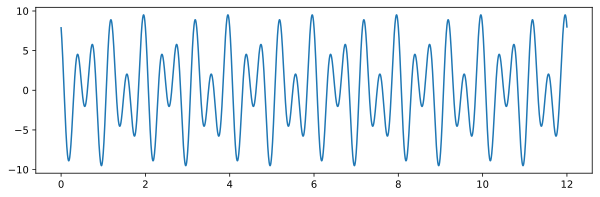

In [7]:

new = np.array([])
for i in range(len(frequency)):
    if abs(y_[i])>10000:
        new = np.append(new,[y_[i]])
    else:
        new = np.append(new,[complex(0,0)])
plt.plot(x,np.fft.ifft(new))


可以看到噪声没有了

**2 简单的一维卷积**

本问题让大家更加熟悉怎么卷（bushi；

众所周知对于两个离散序列 {$f_i, i = 0, \dots , N_f-1$} 和 {$w_j, j = 0, \dots , N_w-1$}，它们的离散卷积$g$定义为：
$$
g_n = (f * w)_n = \sum_{m=-\infty}^{\infty} f_m w_{n-m}
$$

简化起见，我们假设$f$ 和 $w$在采样范围以外的值都是0。

**(a)** 随机生成两个分别长为 $N_f$ 和 $N_w$ 的正态分布序列作为$f$和$w$，手动按定义补全`my_conv`函数返回卷积序列$g$。为了检验你的函数是否正确，请随机生成一个$N_f=100, N_w=50$，对比你的输出结果和`numpy.convolve`，以及`scipy.signal.convolve`是否一致。

**(b)** 利用任何一个上一问的卷积函数，对 **1(b)** 提到的信号$g(t)$和高斯函数$h(t)$卷积：
$$ h(t) = \frac{1}{\sqrt{\pi}t_H} e^{-(t/t_H)^2} $$

对于$t_H=0.1, 0.15, 0.2$,作出不同$t_H$的卷积结果和原信号$g(t)$的效果对比图，并讨论卷积对原信号的效果，以及不同$t_H$对卷积效果的影响。

**Hint：** 由于这里卷积的信号是准连续序列，卷积结果要记得乘以采样时间间距$dt$；另外你可以对$h(t)$作截断。

**(c)** 接下来我们固定取$N_f=N, N_w=N/2$，并研究一下时间复杂度。显然`my_conv`函数返回完整输出$g$序列的时间复杂度是$O(N^2)$。请利用Python的`time`或`timeit`等模块，
- 对于$N=10, 50, 100, 500, 1000, 2000, 4000$，测量`my_conv`函数和`numpy.convolve`函数运行卷积所需时间随数据长度$N$的变化，并一起作图展示，简要讨论你的结果。
- 对于更大的$N$的值(至少取到$2*10^5$)，测量`numpy.convolve`函数和`scipy.signal.convolve`函数运行卷积所需时间随数据长度$N$的变化，并一起作图展示，简要讨论你的结果。

**Hint**：自动测量代码运行时间的办法之一如下：

```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```

**Bonus (d)** 本问仍然固定取$N_f=N, N_w=N/2$。你可能已经注意到了`scipy.signal.convolve`明显的高效表现，请自行查阅资料调查其原因(**Hint**：时间复杂度不同)，利用图表、公式等组织语言，参考以下内容表述你的调查结果：
- 解释`scipy.signal.convolve`在算法上的优越性，并指出其理论上的时间复杂度；
- 基于上述算法思想，编写函数`my_conv_accelerated`进行算法改进，并运行代码验证你的算法首先结果正确，然后在时间开销上和`numpy.convolve`和`scipy.signal.convolve`对比，验证其显著击败`numpy.convolve`。(祝贺！你已经能够写出优于`numpy`内置库的代码了)

卷积这个概念在信号处理中也有着极其重要的地位，对相关知识感兴趣的同学请自行探索，这里限于作业篇幅实在不便继续补充（折磨）（滑稽


In [8]:
def my_conv(f, w):    
    Nf, Nw = len(f), len(w)
    conv = np.zeros(Nf + Nw - 1)
    # continue your code here
    for i in range(Nf+Nw-1):
        for j in range(max(0,i-Nw+1),min(i+1,Nf)):
            conv[i] += f[j]*w[i-j] 
    return conv

def my_conv_accelerated(f, w):
    Nf, Nw = len(f), len(w)
    # continue your code here
    
    return 'faster_conv'

**(a)**

numpy & me result [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True False  True False False False
 False False  True False  True False False False False False False False
  True False  True  True False False  True False  True  True False False
 False False False False False False  True False False False  True False
  True  True  True  True False  True  True False  True  True False False
 False  True False False False False False False False  True False False
 False False False  True False  True  True False  True  True False False
 False False False  True False  True False  True  True False  True  True
 False  True  True False  True False  True  True False  True False  True
 False False  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
scipy & me result [ True  True  True  True  True  True  True  True  True  

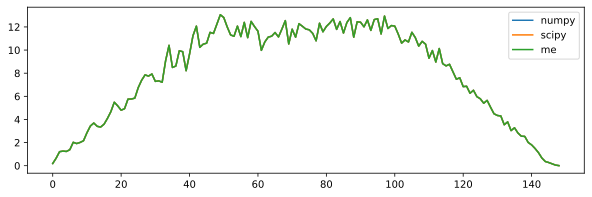

In [9]:
ftest = np.random.random(100)
wtest = np.random.random(50)
a = np.convolve(ftest,wtest)
import scipy
b = scipy.signal.convolve(ftest,wtest)
c = my_conv(ftest,wtest)
print('numpy & me result',a==c)
print('scipy & me result',b==c)
plt.plot(a,label = 'numpy')
plt.plot(b,label = 'scipy')
plt.plot(c,label = 'me')
plt.legend()

从直接比对结果上看貌似不一样，但是画图就能发现这应该是计算误差导致的

**(b)**

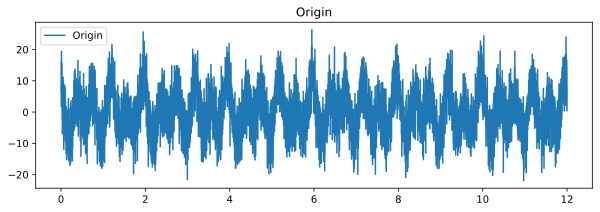

In [10]:
def h(t,th):
    return (1/math.sqrt(math.pi)*th)*math.exp(-(t/th)**2)

t = np.linspace(-10,10,300)
x = np.linspace(0,12,8000)
y = np.array([g(i) for i in x])
plt.plot(x,y,label = 'Origin')
plt.title('Origin')
plt.legend()

Text(0.5, 1.0, 'tH=0.1')

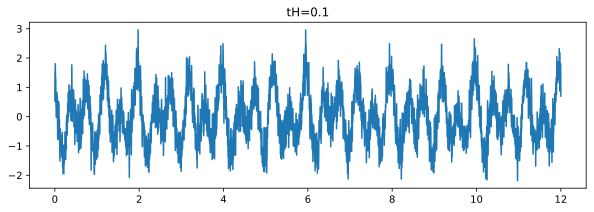

In [11]:
T = np.array([h(i,0.1) for i in t ])
newy = np.convolve(y,T)[149:-150]
plt.plot(x,newy)
plt.title('tH=0.1')

Text(0.5, 1.0, 'tH=0.1')

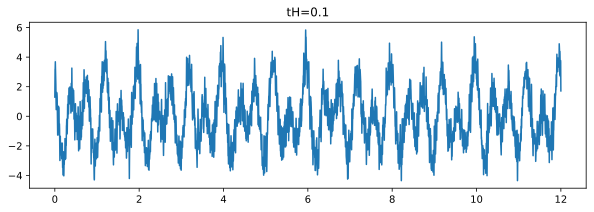

In [12]:
T = np.array([h(i,0.15) for i in t ])
newy = np.convolve(y,T)[149:-150]
plt.plot(x,newy)
plt.title('tH=0.1')

Text(0.5, 1.0, 'tH=0.1')

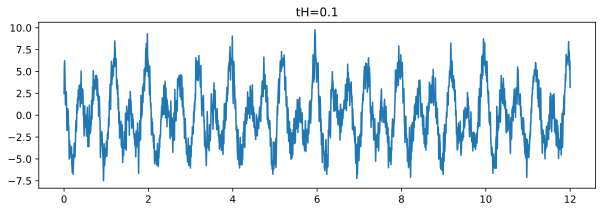

In [13]:
T = np.array([h(i,0.2) for i in t ])
newy = np.convolve(y,T)[149:-150]
plt.plot(x,newy)
plt.title('tH=0.1')

可以看到曲线越来越平滑了，$t_H$越大曲线平滑越快，这样确实能处理一部分噪声，不过过大时会损失很多原本的信号

**(c)**

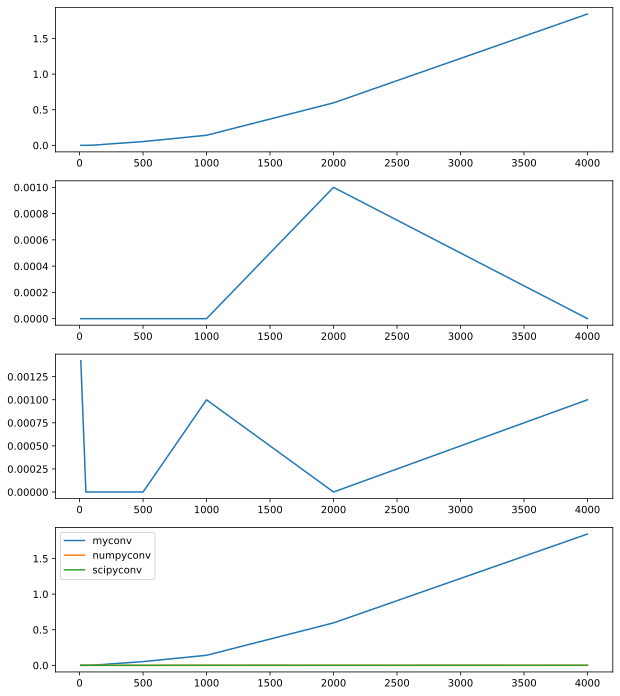

In [14]:
plt.rcParams['figure.figsize'] = (10, 12)
N = np.array([10,50,100,500,1000,2000,4000])
f = [[np.random.random(i),np.random.random(i//2)] for i in N]
import time
metime = []
nptime =[]
scitime = []
for i in f:
    t1 = time.time()
    g = my_conv(i[0], i[1])
    t2 = time.time()
    metime.append(t2-t1)
    t1 = time.time()
    g = np.convolve(i[0], i[1])
    t2 = time.time()
    nptime.append(t2-t1)
    t1 = time.time()
    g = scipy.signal.convolve(i[0], i[1])
    t2 = time.time()
    scitime.append(t2-t1)
plt.subplot(4,1,1)
plt.plot(N,metime,label = 'myconv')
plt.subplot(4,1,2)
plt.plot(N,nptime,label = 'numpyconv')
plt.subplot(4,1,3)
plt.plot(N,scitime,label = 'scipyconv')
plt.subplot(4,1,4)
plt.plot(N,metime,label = 'myconv')
plt.plot(N,nptime,label = 'numpyconv')
plt.plot(N,scitime,label = 'scipyconv')
plt.legend()

可以看到我们的代码由于没有任何优化耗时最长

**（d）**


区别在于圆周卷积和线性卷积，利用圆周卷积可以更快计算出结论

**3 梯度下降**

本问题想让大家应用一下最速梯度法和共轭梯度法来做一些优化。

**(a)** 考察函数$f(x,y)=x^2+12y^2+3xy+13x$，请从初猜$(0, 0)$开始，分别使用讲义中标准的最速梯度法和共轭梯度法进行迭代优化，迭代至下一步函数值减小$10^{-5}$以内即停止。请画出$f(x,y)$的热力图或等高线图(`matplotlib.pyplot.contour`或`matplotlib.pyplot.contourf`)，然后在图上用两种颜色画出两种方法的迭代路线，讨论这个结果。

**注意：接下来的(b)(c)(d)问都是附加题，做了加分，不做不扣分。**

**Bonus (b)** 你可能会发现共轭梯度法的效果十分拔群，但很遗憾：并不是所有的函数都是这么美丽的二次型；对于很多比较病态的函数，如果不对优化算法进行改进，共轭梯度反而会导致灾难性的结果。举个例子：**Rosenbrock's Banana Function**：https://en.wikipedia.org/wiki/Rosenbrock_function
$$
f(x,y)=(x-1)^2 + 100(y-x^2)^2
$$
由于这里不再是简单的二次型，对于搜索方向$\hat n_k$，每步搜索的'步长'$\alpha_k$是必须人为选取的参数，这就叫超参数(Hyperparameter)，在机器学习中名叫学习率：
$$
\vec{r}_{k+1}=\vec{r}_k - \alpha_k \vec n_k 
$$

请仍然从初猜$(0, 0)$开始，取不同数量级的常数学习率$\alpha$(在优化过程中不改变)，用最速梯度和共轭梯度进行迭代优化，作图讨论你观察到的现象。

**Hint**：函数值迭代到$10^{-4}$就可以算收敛(显然最小值是0)；可以讨论两种算法下收敛性，迭代步数受学习率的影响。

**Bonus (c)** 你可能对共轭梯度法失去了信心，但实际上学习率$\alpha$随着优化的进行应当也有动态的调整。事实上`Scipy`中内置的优化库就可以利用共轭梯度法在几十步内迭代就完成我们上述的任务。请调用`scipy.optimize`验证这件事情，并接受降维打击（笑。这个故事告诉我们，不要试图用业余水平挑战专业人士写的代码。类似的故事在实际科研中十分常见，因此虽然我们要求你手写了一些优化算法，我们仍然建议你优先借助`scipy.optimize`成为调包侠。

**Bonus (d)** 你能否结合资料对算法进行改良，缩短 **(b)** 问的迭代次数？这是一个开放性问题，任何的策略、思路或者算法都可以畅所欲言。Let your ideas fly!

**(a)**

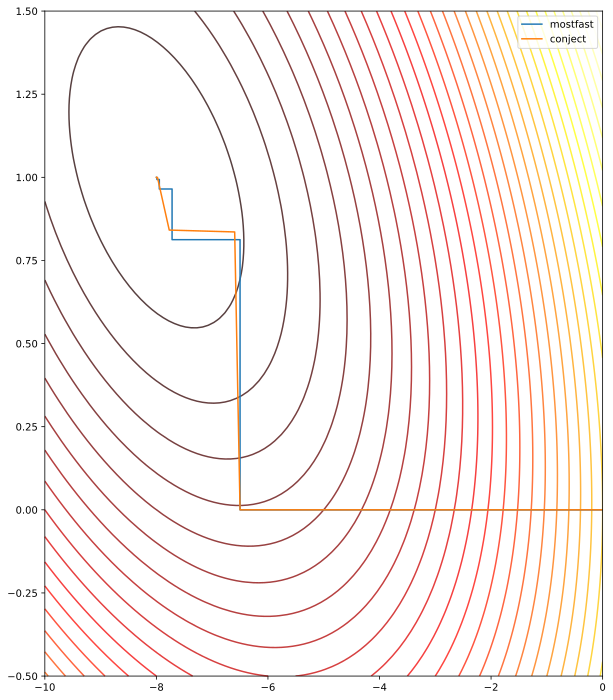

In [15]:
def f(x,y):
    x,y 
    return x**2+12*y**2+3*x*y+13*x
def fd(a):
    x,y =a[0],a[1]
    return np.array([2*x+3*y+13,24*y+3*x])
def H(a):
    x,y =a[0],a[1]
    return np.array([[2,3],[3,24]])
def zsxj(a):
    return np.subtract(a,(np.dot(fd(a),fd(a))/np.dot(fd(a),np.dot(H(a),fd(a))))*fd(a))
def conject(a,p):
    r =  fd(a)
    alpha = -np.dot(r,p)/np.dot(p,np.dot(H(a),p))
    a = np.add(a,alpha*p)
    r_ = fd(a)
    beta = np.dot(r_,r_)/np.dot(r,r)
    p_ = np.add(beta*p,-r_)
    return a,p_
x = np.linspace(-10,0,100)
y = np.linspace(-0.5,1.5,100)
X, Y = np.meshgrid(x, y)  
plt.contour(X,Y,f(X,Y),32, alpha = 0.75,cmap = plt.cm.hot)
origin = np.array([0,0])
zsxjdata = []
while True:
    zsxjdata.append(origin)
    temp = f(origin[0],origin[1])
    origin = zsxj(origin)
    if abs(temp-f(origin[0],origin[1])) < 1e-5:
        break
plt.plot([i[0] for i in zsxjdata],[i[1] for i in zsxjdata],label='mostfast')
origin = np.array([0,0])
condata = [origin]
p = np.array([-1,0])
while True:
    temp = f(origin[0],origin[1])
    origin,p = conject(origin,p)
    condata.append(origin)
    if abs(temp-f(origin[0],origin[1])) < 1e-5:
        break
plt.plot([i[0] for i in condata],[i[1] for i in condata],label='conject')
plt.legend()

最速下降是垂直的折线，但是共轭梯度显然更加短的路径就实现了

**(b)**

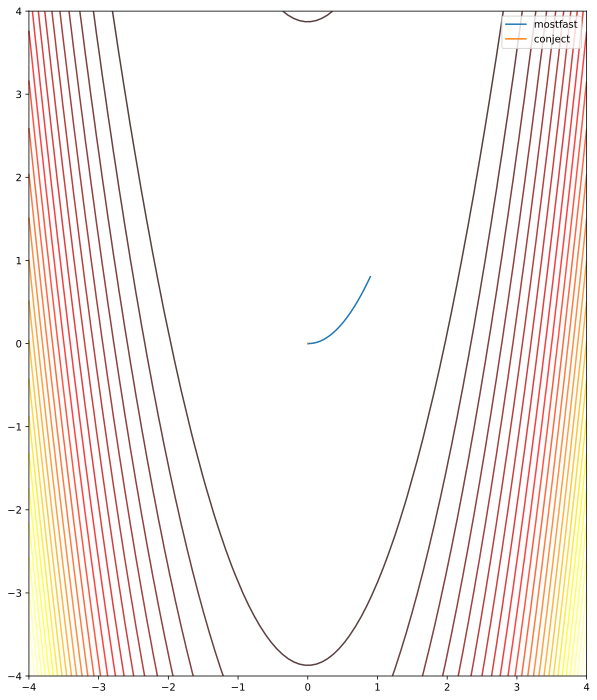

In [16]:
def f(x,y):
    return (x-1)**2+100*(y-x**2)**2
def fd(a):
    x,y =a[0],a[1]
    return np.array([2*x+400*x*(x**2-y)-2,200*(y-x**2)])
def H(a):
    x,y =a[0],a[1]
    return np.array([[2+1200*x**2-400*y,-400*x],[-400*x,200]])
def zsxj(a,study):
    return np.subtract(a,study*fd(a))
def conject(a,p,study):
    r =  fd(a)
    a = np.add(a,study*p)
    r_ = fd(a)
    beta = np.dot(r_,r_)/np.dot(r,r)
    p_ = np.add(beta*p,-r_)
    return a,p_
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
X, Y = np.meshgrid(x, y)  
plt.contour(X,Y,f(X,Y),32, alpha = 0.75,cmap = plt.cm.hot)
origin = np.array([0,0])
zsxjdata = []
while True:
    zsxjdata.append(origin)
    temp = f(origin[0],origin[1])
    origin = zsxj(origin,0.001)
    if abs(temp-f(origin[0],origin[1])) < 1e-5:
        break
plt.plot([i[0] for i in zsxjdata],[i[1] for i in zsxjdata],label='mostfast')
origin = np.array([0,0])
condata = [origin]
p = np.array([-1,0])
while True:
    temp = f(origin[0],origin[1])
    origin,p = conject(origin,p,0.00001)
    condata.append(origin)
    if abs(temp-f(origin[0],origin[1])) < 1e-4:
        break
plt.plot([i[0] for i in condata],[i[1] for i in condata],label='conject')
plt.legend()

观察到学习率过大时会最速梯度发散，而共轭梯度很难找到合适的学习率来完成这个迭代

**(c)**

In [17]:
from scipy.optimize import minimize

def f(a):
    x,y = a[0],a[1]
    return (x-1)**2+100*(y-x**2)**2

mymin = minimize(f, np.array([0,0]), method='CG')

print(mymin)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.0085382242752512e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 21
     jac: [ 5.412e-06 -2.705e-06]
    nfev: 165
    njev: 55


**(d)**

不同的下降算法本质上依赖于不同的范数，解决这个问题就要寻找新的范数，比如说BB方法

\begin{equation}
\begin{aligned}
\alpha_k^{\mathrm{BB} 1} & =\frac{g_{k-1}^{\mathrm{T}} g_{k-1}}{g_{k-1}^{\mathrm{T}} G g_{k-1}}, \\
\alpha_k^{\mathrm{BB} 2} & =\frac{g_{k-1}^{\mathrm{T}} G g_{k-1}}{g_{k-1}^{\mathrm{T}} G^2 g_{k-1}} .
\end{aligned}
\end{equation}

**作业完成情况**：大约五个小时左右，第一题的频域一直不知道哪里有问题后来发现根本没问题只是频域取太宽了导致啥也看不出来，后面的梯度下降在程序上极其难以debug也带来了不少困难，总体来讲感觉这次作业还是有一定难度的

**致谢**：独立完成，参考了数值分析中对于BB方法的介绍

[1.05618876e-03+0.00000000e+00j 5.00005763e-01+0.00000000e+00j
 5.02119131e-01+0.00000000e+00j 2.00002338e+00+0.00000000e+00j
 2.00210321e+00+0.00000000e+00j 4.50005390e+00+0.00000000e+00j
 4.50207299e+00+0.00000000e+00j 8.00009922e+00+0.00000000e+00j
 8.00202774e+00+0.00000000e+00j 1.25001624e+01+0.00000000e+00j
 1.25019645e+01+0.00000000e+00j 1.80002482e+01+0.00000000e+00j
 1.80018786e+01+0.00000000e+00j 2.45003641e+01+0.00000000e+00j
 2.45017624e+01+0.00000000e+00j 3.20005219e+01+0.00000000e+00j
 3.20016036e+01+0.00000000e+00j 4.05007405e+01+0.00000000e+00j
 4.05013802e+01+0.00000000e+00j 5.00010548e+01-2.49190357e-05j
 5.00010548e+01+2.49190357e-05j 6.05005571e+01+0.00000000e+00j
 6.05015400e+01+0.00000000e+00j 7.19997109e+01+0.00000000e+00j
 7.20023732e+01+0.00000000e+00j 8.44979933e+01+0.00000000e+00j
 8.45040676e+01+0.00000000e+00j 9.79927895e+01+0.00000000e+00j
 9.80092149e+01+0.00000000e+00j 1.12474340e+02+0.00000000e+00j
 1.12527756e+02+0.00000000e+00j 1.27988440e+02+0.000000

C:\Users\86189\AppData\Local\Temp\ipykernel_34968\481706069.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  H[i][j] = 0.5*(i-kmax)**2+k[i-j+kmax]
C:\Users\86189\AppData\Local\Temp\ipykernel_34968\481706069.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  H[i][j] = k[i-j+kmax]
d:\python\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


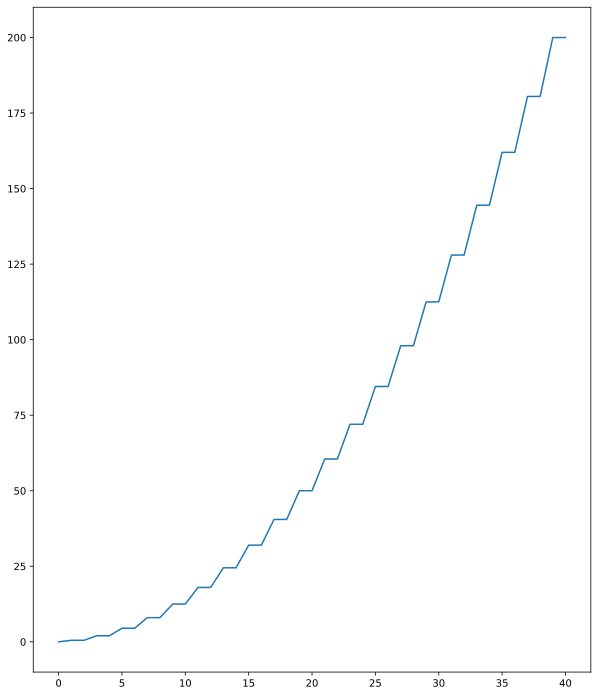

In [34]:
kmax =20
N = 100
T = 1.0 / N
x = np.linspace(-math.pi,math.pi, N)
y = np.square(x)/2
y_fft = np.fft.fft(y)
k = y_fft*2 / N
k = np.fft.fftshift(k)
H = np.zeros((2*kmax+1,2*kmax+1))
for i in range(2*kmax+1):
    for j in range(2*kmax+1):
        if i == j:
            H[i][j] = 0.5*(i-kmax)**2+k[i-j+kmax]
        else:
            H[i][j] = k[i-j+kmax]
values, vec = np.linalg.eig(H)
values.sort()
print(values)
plt.plot(values)